In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [4]:
df = pd.read_csv('../Data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
# Separate independent and dependent variables
X = df.drop(columns=["output"])
y = df["output"]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform on train data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data (NO fitting)

In [20]:
import numpy as np

class NeuralNetworkFromScratch:
    """
    A simple neural network implemented from scratch using NumPy.

    Parameters:
    - LR: Learning rate for gradient descent
    - X_train: Training data (features)
    - y_train: Training labels (targets)
    - X_test: Testing data (features)
    - y_test: Testing labels (targets)
    """
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        # Initialize weights randomly based on the number of features
        self.w = np.random.randn(X_train_scaled.shape[1])  # Weight vector (1 per feature)
        
        # Initialize the bias as a random scalar
        self.b = np.random.randn()

        # Store the learning rate
        self.LR = LR  

        # Store training and testing data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.X_test = np.array(X_test)
        self.y_test = np.array(y_test)

        # Lists to store loss values during training
        self.L_train = []  # Stores training loss history
        self.L_test = []   # Stores testing loss history

    def activation(self, x):
        """
        Sigmoid activation function.
        Converts input values into probabilities in the range (0,1).
        """
        return 1 / (1 + np.exp(-x))
    
    def deactivation(self, x):
        """
        Derivative of the sigmoid function.
        This is used for backpropagation to compute gradients.
        """
        sig = self.activation(x)
        return sig * (1 - sig)
    
    def forward(self, X):
        """
        Forward propagation step.
        Computes weighted sum of inputs and applies activation function.
        
        Parameters:
        - X: Input features (numpy array)
        
        Returns:
        - Activated output (predicted probability)
        """
        hidden_output = np.dot(X, self.w) + self.b  # Weighted sum + bias
        activated_output = self.activation(hidden_output)  # Apply sigmoid activation
        return activated_output
    
    def backward(self, X, y_true):
        """
        Backpropagation step to compute gradients of weights and bias.

        Parameters:
        - X: Input features
        - y_true: True labels (ground truth)

        Returns:
        - dL_db: Gradient of loss w.r.t bias
        - dL_dw: Gradient of loss w.r.t weights
        """
        hidden_output = np.dot(X, self.w) + self.b  # Compute weighted sum
        y_pred = self.forward(X)  # Get predicted values
        
        # Compute gradient of the loss with respect to the predicted output
        dL_dpred = 2 * (y_pred - y_true)  # Derivative of MSE loss
        
        # Compute derivative of activation function with respect to the weighted sum
        dpred_dhidden = self.deactivation(hidden_output)  # Sigmoid derivative
        
        # Partial derivatives
        dL_db = np.sum(dL_dpred * dpred_dhidden)  # Gradient for bias
        dL_dw = np.dot(X.T, dL_dpred * dpred_dhidden)  # Gradient for weights
        
        return dL_db, dL_dw
    
    def optimizer(self, dL_db, dL_dw):
        # Update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # Ensure correct indexing
            random_post = np.random.randint(self.X_train.shape[0])  
            
            # Use numpy indexing
            x_sample = self.X_train[random_post]  # Input features
            y_sample = self.y_train[random_post]  # True label

            # Forward propagation
            y_pred = self.forward(x_sample)

            # Compute training loss
            L = np.sum(np.square(y_pred - y_sample))
            self.L_train.append(L)

            # Compute gradients
            dL_db, dL_dw = self.backward(x_sample, y_sample)

            # Update weights
            self.optimizer(dL_db, dL_dw)

            # Compute test loss
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "Training successful"

        







In [18]:
LR = 0.1
ITERATIONS = 1000

In [21]:
nn = NeuralNetworkFromScratch(LR= LR, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)
nn.train(ITERATIONS=ITERATIONS)

'Training successful'

<Axes: >

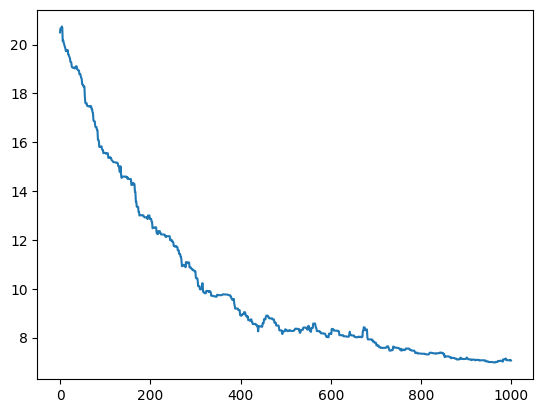

In [22]:
sns.lineplot(x=list(range(len(nn.L_test))), y= nn.L_test)

In [24]:
total = X_test_scaled.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test.iloc[i]
    y_pred = np.round(nn.forward(X_test_scaled[i]))
    y_preds.append(y_pred)
    correct +=1 if y_true == y_pred else 0



In [25]:
# Calculate accuracy
correct / total

0.8852459016393442

In [26]:
# Baseline Classifier
from collections import Counter
Counter(y_test)

Counter({1: 32, 0: 29})

In [27]:
32/61

0.5245901639344263

In [28]:
# Confusion Matrix
confusion_matrix(y_true=y_test, y_pred= y_preds)


array([[25,  4],
       [ 3, 29]])

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true=y_test
y_pred= y_preds
# Compute metrics using sklearn
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8852
Precision: 0.8788
Recall: 0.9062
F1 Score: 0.8923
